press_0 is  0.6
alfven velo =  1.8027756377319946
ws_fast is  1.9999012222067571
ws_slow is  0.5003949454340229
period is 0.9992600849201241


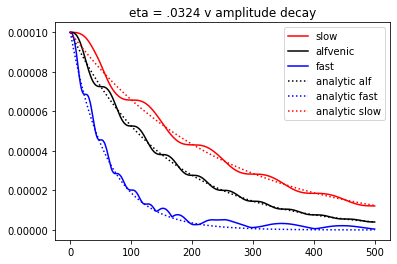

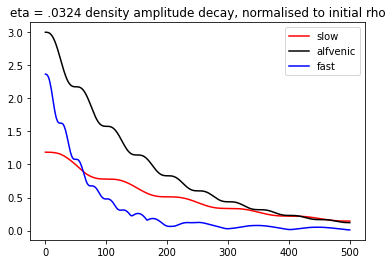

In [6]:
import numpy as np
from matplotlib import pylab as plt
import athena_read

#Time evolution for the AD cases

import numpy as np
from matplotlib import pyplot as plt
#set up time array for referencing files in the format that athena outputs

lin_space = np.linspace(0,500,501)
file_list = []

for n in lin_space:
    n = str(int(n))
    while len(n) < 5:
        n = '0'+n
    file_list.append(n)


#set up max rho list to plot amplitude vs time later
vy_max_arr = []
vy_max_arr2 = []
vy_max_arr3 = []

#redefine vy_plot to be used for this specific subsection

def rho_plot(file_name,plot_name):
  
    x,y,z,data = athena_read.vtk(file_name)

    #redefine x values to be average of adjacent outputs
    x_avg = []
    #print(data)
    for i in range(len(x)-1):
        x_avg.append((x[i]+x[i+1])/2)

   
    rho = data['rho'][0][0]

    plt.plot(x_avg,rho,label = plot_name)
    #return maxima to show time evolution
    return max(rho)

def vely_plot(file_name,plot_name):

    x,y,z,data = athena_read.vtk(file_name)

    #redefine x values to be average of adjacent outputs
    x_avg = []

    for i in range(len(x)-1):
        x_avg.append((x[i]+x[i+1])/2)

    vel = np.sqrt((data['vel'][0][0][:,1]**2)+(data['vel'][0][0][:,0]**2)+(data['vel'][0][0][:,2]**2))
    #plt.plot(x_avg,vel,label = plot_name)
    #return maxima to show time evolution
    return max(vel)

for t in file_list:
    vy_max_arr.append(vely_plot('/home/asmohov/ppd/baistone/1d_slow_5_cfl/LinWave.block0.out2.'+t+'.vtk',t+' slow'))
    vy_max_arr2.append(vely_plot('/home/asmohov/ppd/baistone/1d_alf_5_cfl/LinWave.block0.out2.'+t+'.vtk',t+' alfvenic'))
    vy_max_arr3.append(vely_plot('/home/asmohov/ppd/baistone/1d_fast/LinWave.block0.out2.'+t+'.vtk',t+' fast'))
#plt.show()

#----------------------------------------------------------
#analytical
#initial perturbation taken from analytical solutions for non-damped
vy_fast = 4.219867438701534e-05
vy_alf = 3.333333333333333e-05
vy_slow = 8.430990907875269e-05

amp = .001
#overall velocities derived from athena++ paper
#Defined variables (taken from input file)
gamma = (5/3)
k = np.pi*2
cs = 1
amp = .0001
dt = .01
t = dt*4000
B_0 = np.sqrt(3.25) #calculate from code
rho_0 = 1
theta = .9823 #RAD, calculate from source code

#from code
bx0 = 1.0
by0 = np.sqrt(2.0)
bz0 = 0.5

#Derived variables
#alfven velocity
v_a = np.sqrt((B_0**2)/(rho_0))
press_0 = 1/gamma
print('press_0 is ',press_0)

print('alfven velo = ',v_a)
#dispersion relation for alfvenic waves
omega_alf = np.sqrt((k**2)*(v_a**2)*((np.cos(theta)**2)))

#dispersion relation for fast
omega_slow_sq = .5*(k**2)*((v_a**2)+(cs**2)-np.sqrt((v_a**2+cs**2)**2-4*v_a**2*cs**2*(np.cos(theta))**2))
omega_slow = np.sqrt(omega_slow_sq)
#dispersion relation for slow
omega_fast_sq = .5*(k**2)*((v_a**2)+(cs**2)+np.sqrt((v_a**2+cs**2)**2-4*v_a**2*cs**2*(np.cos(theta))**2))
omega_fast = np.sqrt(omega_fast_sq)
#analytical equation for rho, taking the sin part

ws_fast = omega_fast/k
ws_slow = omega_slow/k
print('ws_fast is ',ws_fast)
print('ws_slow is ',ws_slow)
print('period is',np.pi*2/omega_alf)
#perturbation amplitude factors from athena paper

alpha_f = np.sqrt((cs**2-ws_slow**2)/(ws_fast**2-ws_slow**2))
C_ff = ws_fast*alpha_f
alpha_s = np.sqrt((ws_fast**2-cs**2)/(ws_fast**2-ws_slow**2))
C_ss = ws_slow*alpha_s
beta_z = bz0/np.sqrt(by0**2+bz0**2)
beta_y = by0/np.sqrt(by0**2+bz0**2)
A_f = cs*np.sqrt(rho_0)*alpha_f
A_s = cs*np.sqrt(rho_0)*alpha_s
#since sgn(bx) is constant and positive, Q_f from the paper is same as C_ff
#similarly, Q_s = C_ss
Q_f= C_ff
Q_s =C_ss

v_alf = v_a #swap to other variable name
#---------------------------------------------------------------------
#plotting
#plot numerical solutions
plt.title('eta = .0324 v amplitude decay')
plt.plot(lin_space,vy_max_arr,label = 'slow', color = 'r')
plt.plot(lin_space,vy_max_arr2,label = 'alfvenic', color='k')
plt.plot(lin_space,vy_max_arr3,label = 'fast', color = 'b')

#plot analytical solutions
#taken from ideal MHD

w_a = 100

Q_a = (v_alf**2)*((np.cos(theta))**2)/w_a

gamma_a = Q_a*2*(np.pi**2)
gamma_f = Q_a*5.2*(np.pi**2)
gamma_s = Q_a*1.3*(np.pi**2)

#velocity perturbations
v_alf_pert = amp
v_fast_pert = amp
v_slow_pert = amp

ana_a_vely = []
ana_f_vely = []
ana_s_vely = []

for t in lin_space:
    t = .01*t #adjust to code dt
    #3.25 is B0 **2
    ana_a_vely.append(v_alf_pert*np.exp(-3.25*gamma_a*t))
    ana_f_vely.append(v_fast_pert*np.exp(-3.25*gamma_f*t))
    ana_s_vely.append(v_slow_pert*np.exp(-3.25*gamma_s*t))

plt.plot(lin_space,ana_a_vely,'k:',label = 'analytic alf')  
plt.plot(lin_space,ana_f_vely,'b:',label = 'analytic fast')
plt.plot(lin_space,ana_s_vely,'r:',label = 'analytic slow')


#plt.ylim([0,5e-5])
plt.legend()
plt.show()

#normalise to 5e-5, like bai and stone


vy_max_arr[:] = [i/vy_slow for i in vy_max_arr]
vy_max_arr2[:] = [i/vy_alf for i in vy_max_arr2]
vy_max_arr3[:] = [i/vy_fast for i in vy_max_arr3]

plt.title('eta = .0324 density amplitude decay, normalised to initial rho')
plt.plot(lin_space,vy_max_arr,label = 'slow',color = 'r')
plt.plot(lin_space,vy_max_arr2,label = 'alfvenic',color = 'k')
plt.plot(lin_space,vy_max_arr3,label = 'fast',color = 'b')


plt.legend()
plt.show()
